**Table of contents**<a id='toc0_'></a>    
- [Importing Libraries](#toc1_)    
- [Configuring Visualization Parameters](#toc2_)    
- [Configuring Other Notebook Parameters](#toc3_)    
- [Pre-installing Custom Functions](#toc4_)    
- [Practicing in Stages](#toc5_)    
  - [DICOM in Python](#toc5_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Importing Libraries](#toc0_)


In [1]:
import pydicom

import SimpleITK as sitk

In [2]:
from pathlib import Path

In [3]:
import numpy as np

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
import reprlib
import sys

# <a id='toc2_'></a>[Configuring Visualization Parameters](#toc0_)


In [6]:
%matplotlib inline

In [7]:
XINHUI = "#7a7374"
XUEBAI = "#fffef9"
YINBAI = "#f1f0ed"
YINHUI = "#918072"

figure_size = (16, 9)

In [8]:
custom_params = {
    "axes.axisbelow": True,
    "axes.edgecolor": YINBAI,
    "axes.facecolor": XUEBAI,
    "axes.grid": True,
    "axes.labelcolor": XINHUI,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlecolor": XINHUI,
    "figure.edgecolor": YINBAI,
    "figure.facecolor": XUEBAI,
    "grid.alpha": 0.8,
    "grid.color": YINBAI,
    "grid.linestyle": "--",
    "grid.linewidth": 1.2,
    "legend.edgecolor": YINHUI,
    "patch.edgecolor": XUEBAI,
    "patch.force_edgecolor": True,
    "text.color": XINHUI,
    "xtick.color": YINHUI,
    "ytick.color": YINHUI,
}

mpl.rcParams.update(custom_params)

# <a id='toc3_'></a>[Configuring Other Notebook Parameters](#toc0_)


In [9]:
reprlib_rules = reprlib.Repr()
reprlib_rules.maxother = 250

In [10]:
# `np.set_printoptions` is used to set print options that determine how floats, arrays
# and other NumPy objects are formatted

# Here, this setting is used to widen the printed array
np.set_printoptions(formatter=dict(int=lambda x: f"{x:4}"))

# <a id='toc4_'></a>[Pre-installing Custom Functions](#toc0_)


In [11]:
sys.path.append("../")

In [12]:
from Modules import *

# <a id='toc5_'></a>[Practicing in Stages](#toc0_)

## <a id='toc5_1_'></a>[DICOM in Python](#toc0_)


In [13]:
dir_name="../Datasets/Kaggle - CT Medical Images/dicom_dir/"
sample_dcm = "ID_0000_AGE_0060_CONTRAST_1_CT.dcm"
dicom_file = pydicom.read_file(dir_name + sample_dcm)  # read single dicom file

print(dicom_file)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088

In [14]:
print(dicom_file[0x0028, 0x0010])
print(dicom_file[0x0028, 0x0011])
print(dicom_file[0x0018, 0x0015])

(0028, 0010) Rows                                US: 512
(0028, 0011) Columns                             US: 512
(0018, 0015) Body Part Examined                  CS: 'CHEST'


In [15]:
print('Rows: ', dicom_file.Rows)
print('Columns: ', dicom_file.Columns)
print('Body Part Examined: ', dicom_file.BodyPartExamined)

Rows:  512
Columns:  512
Body Part Examined:  CHEST


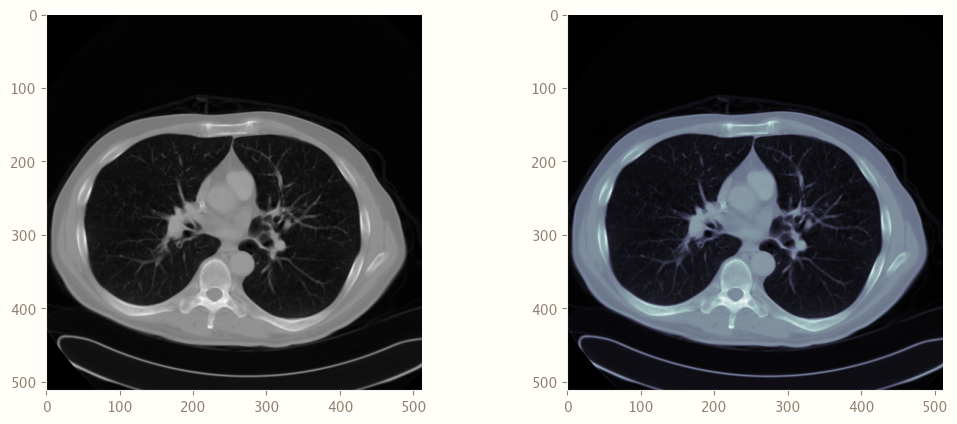

In [16]:
ct = dicom_file.pixel_array

# The default matplotlib colormap is called 'viridis'
def image_display(image, ax, title, cmap):
    # Data can be displayed as an image using `imshow`, but only on a 2D regular raster,
    # so it needs to be reshaped into a 2D array
    ax.imshow(image, cmap)
    ax.grid(False)
    ax.set_title(title, loc="center", pad=10)
    #ticks = list(range(0, 28, 10))
    #ax.set(xticks=ticks, xticklabels=ticks, yticks=ticks, yticklabels=ticks)
    ax.set_xlim(left=0)
    ax.set_ylim(top=0)
    #ax.minorticks_on()
    return ax


plt.rcParams["figure.figsize"] = (figure_size[0] / 3 * 2, figure_size[1] / 2)

#random_selector = np.random.choice(range(len(train_data)), 4)

fig, axs = plt.subplots(nrows=1, ncols=2)

image_display(
    ct,
    axs[0],
    "",
    cmap="gray",
)

image_display(
    ct,
    axs[1],
    "",
    cmap="bone",
)


fig.suptitle(
    "",
    fontsize="x-large",
    x=0.5,
    y=0,
)

plt.tight_layout()
plt.show()